In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from fancyimpute import KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [123]:
df = pd.read_csv('../Dataset/kidney_disease.csv')

In [124]:
df.drop(columns=['id'], inplace=True)

In [125]:
df.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [126]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [128]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: >

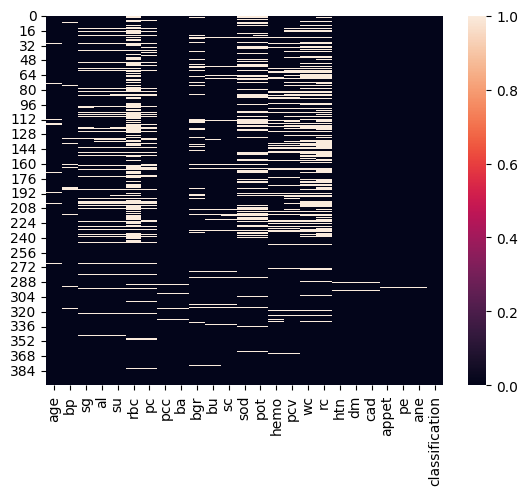

In [129]:
sns.heatmap(df.isnull())

In [130]:
df.shape

(400, 25)

In [131]:

lb=LabelEncoder()
df['rbc']=lb.fit_transform(df['rbc'])
df['pc']=lb.fit_transform(df['pc'])
df['pcc']=lb.fit_transform(df['pcc'])
df['ba']=lb.fit_transform(df['ba'])
df['htn']=lb.fit_transform(df['htn'])
df['dm']=lb.fit_transform(df['dm'])
df['cad']=lb.fit_transform(df['cad'])
df['appet']=lb.fit_transform(df['appet'])
df['pe']=lb.fit_transform(df['pe'])
df['ane']=lb.fit_transform(df['ane'])
df['classification']=lb.fit_transform(df['classification'])


In [132]:
# Replace Blank values with DataFrame.replace() methods.

print(df)


      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv    wc  \
0    48.0  80.0  1.020  1.0  0.0    2   1    0   0  121.0  ...   44  7800   
1     7.0  50.0  1.020  4.0  0.0    2   1    0   0    NaN  ...   38  6000   
2    62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   31  7500   
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...   32  6700   
4    51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...   35  7300   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...   53  6800   

      rc  htn  dm cad appet pe  ane  classification  
0    5.2    1   4   1

In [133]:
df['age']=df['age'].fillna(df['age'].mean()) 

In [134]:
df.replace('\t?', float('nan'), inplace=True)  # Replace '\t?' with NaN

# Convert the relevant columns to float
columns_to_convert = [ 'bp',     'sg',   'al' ,  'su',  'rbc',  'pc',  'pcc' , 'ba'  ,'bgr', 'bu', 'sc', 'sod', 'pot' ,'hemo' ,'pcv' , 'wc' , 'rc' ,'htn',  'dm'  ,'cad',  'appet' , 'pe' , 'ane' , 'classification']  # Replace with the actual column names
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

In [135]:
knn_imputer = KNN()
df = knn_imputer.fit_transform(df)

Imputing row 1/205 with 0 missing, elapsed time: 0.010
Imputing row 101/205 with 0 missing, elapsed time: 0.011
Imputing row 201/205 with 0 missing, elapsed time: 0.011


c:\Python\Lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [136]:
df=pd.DataFrame(df,columns=['age',   'bp',     'sg',   'al' ,  'su',  'rbc',  'pc',  'pcc' , 'ba'  ,'bgr', 'bu', 'sc', 'sod', 'pot' ,'hemo' ,'pcv' , 'wc' , 'rc' ,'htn',  'dm'  ,'cad',  'appet' , 'pe' , 'ane' , 'classification'])

In [137]:

df.tail(30)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
175,75.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,107.0,...,46.0,10300.0,4.8,0.0,3.0,1.0,0.0,0.0,0.0,2.0
176,69.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,83.0,...,50.0,9300.0,5.4,0.0,3.0,1.0,0.0,0.0,0.0,2.0
177,28.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,79.0,...,51.0,6500.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0
178,72.0,60.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,109.0,...,52.0,10500.0,5.5,0.0,3.0,1.0,0.0,0.0,0.0,2.0
179,61.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,133.0,...,47.0,9200.0,4.9,0.0,3.0,1.0,0.0,0.0,0.0,2.0
180,79.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,111.0,...,40.0,8000.0,6.4,0.0,3.0,1.0,0.0,0.0,0.0,2.0
181,70.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,74.0,...,48.0,9700.0,5.6,0.0,3.0,1.0,0.0,0.0,0.0,2.0
182,58.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,88.0,...,53.0,9100.0,5.2,0.0,3.0,1.0,0.0,0.0,0.0,2.0
183,64.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,97.0,...,49.0,6400.0,4.8,0.0,3.0,1.0,0.0,0.0,0.0,2.0
184,62.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,78.0,...,50.0,5400.0,5.7,0.0,3.0,1.0,0.0,0.0,0.0,2.0


In [138]:
df.head(100)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,3.0,1.0,1.0,1.0,1.0,0.0
1,60.0,90.0,1.015,3.0,0.0,2.0,2.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,4.0,1.0,0.0,1.0,0.0,0.0
2,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,4.0,1.0,1.0,0.0,1.0,0.0
3,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,4.0,1.0,1.0,1.0,0.0,0.0
4,68.0,70.0,1.015,3.0,1.0,2.0,1.0,1.0,0.0,208.0,...,28.0,12200.0,3.4,1.0,4.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,42.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,132.0,...,50.0,5000.0,4.5,0.0,3.0,1.0,0.0,0.0,0.0,2.0
96,50.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,97.0,...,48.0,10500.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0
97,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,133.0,...,41.0,6800.0,5.3,0.0,3.0,1.0,0.0,0.0,0.0,2.0
98,48.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,122.0,...,48.0,9500.0,4.8,0.0,3.0,1.0,0.0,0.0,0.0,2.0


In [139]:
X = df.drop('classification', axis=1)
y = df['classification']

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [141]:

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [142]:
# Print classification report for KNeighborsClassifier
print("KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNeighborsClassifier:
              precision    recall  f1-score   support

         0.0       0.67      0.56      0.61        18
         2.0       0.69      0.78      0.73        23

    accuracy                           0.68        41
   macro avg       0.68      0.67      0.67        41
weighted avg       0.68      0.68      0.68        41

Confusion Matrix:
[[10  8]
 [ 5 18]]


In [143]:
# Train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [144]:
# Print classification report for RandomForestClassifier
print("\nRandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        23

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Confusion Matrix:
[[18  0]
 [ 0 23]]


In [145]:
joblib.dump(rf,'../Models/rfc_model.pkl')

['../Models/rfc_model.pkl']

In [146]:
X_train=X_train[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
X_test=X_test[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
rf.fit(X_train,y_train)
def predict(hemo,rc,sg,al,sc,htn,sod,bp,wc,age):
    hemo=float(hemo)
    rc=float(rc)
    sg=float(sg)
    sc=float(sc)
    htn=int(htn)
    sod=float(sod)
    bp=float(bp)
    wc=float(wc)
    age=int(age)
    
    x=[[hemo,rc,sg,al,sc,htn,sod,bp,wc,age]]
    return rf.predict(x)

In [147]:
prediction = predict(67.4,7.2,0.99,4,17.0,1,160.6,87,22089,36)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Great! You don't have Chronic Kidney Disease.


c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
